## importação das bibliotecas

In [10]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import keras 
from tensorflow.keras.applications import ResNet50
%matplotlib inline

### Carregamento do conjunto de dados de treinamento

In [11]:
# mostrar a quantidade de imagens e classes de treinamento 
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    
    "C:/Users/brena/OneDrive/Documentos/bootcamp/projeto-final/Fruits/train",
    
    image_size=(180, 180),  # Definir o tamanho das imagens
    
    batch_size=32 # quantidade de imagens por lote 

)

Found 9636 files belonging to 6 classes.


In [12]:
# mostrar o nome das classes
nomes_classes = dataset.class_names
nomes_classes

['Apple', 'Banana', 'Grape', 'Mango', 'Orange', 'Strawberry']

In [13]:
# Contar a quantidade de imagens por classe
class_counts = {class_name: 0 for class_name in dataset.class_names}

for images, labels in dataset:
    for label in labels:
        class_name = dataset.class_names[label]
        class_counts[class_name] += 1

# Exibir a quantidade de imagens por classe
for class_name, count in class_counts.items():
    print(f'A classe {class_name} tem {count} imagens')

# Exibir a quantidade total de classes
num_classes = len(dataset.class_names)
print(f'Total de classes: {num_classes}')

# Exibir a quantidade total de imagens
total_images = sum(class_counts.values())
print(f'Total de imagens: {total_images}')

# Exibir a porcentagem de imagens por classe
for class_name, count in class_counts.items():
    percentage = (count / total_images) * 100
    print(f'A classe {class_name} tem {percentage:.2f}% das imagens')

A classe Apple tem 1940 imagens
A classe Banana tem 1863 imagens
A classe Grape tem 1940 imagens
A classe Mango tem 1921 imagens
A classe Orange tem 32 imagens
A classe Strawberry tem 1940 imagens
Total de classes: 6
Total de imagens: 9636
A classe Apple tem 20.13% das imagens
A classe Banana tem 19.33% das imagens
A classe Grape tem 20.13% das imagens
A classe Mango tem 19.94% das imagens
A classe Orange tem 0.33% das imagens
A classe Strawberry tem 20.13% das imagens


### Visualização dos dados 

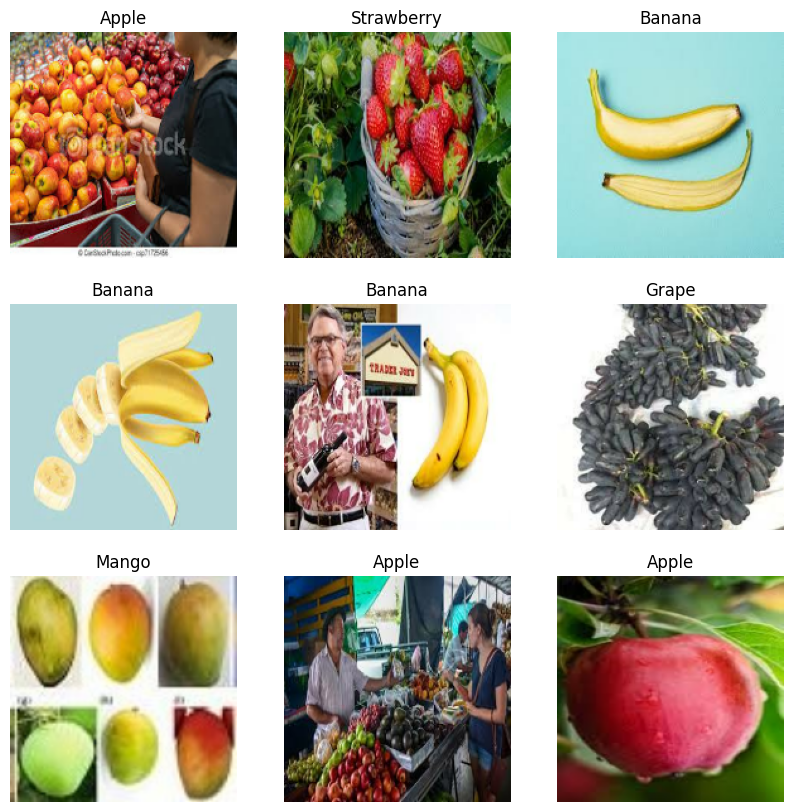

In [14]:
plt.figure(figsize=(10, 10))

for images, labels in dataset.take(1):  # Pegar um lote de imagens
    
    for i in range(9):  # Mostrar as primeiras 9 imagens
        
        ax = plt.subplot(3, 3, i + 1) # exibição das imagens 3X3
        
        plt.imshow(images[i].numpy().astype("uint8"))
        
        plt.title(nomes_classes[labels[i]]) # para mostrar o nome da classe
        
        plt.axis("off")
        
plt.show()

### Dados de treinamento e de validação 

In [15]:
# Definindo image_size e batch_size
image_size = (180, 180)
batch_size = 32

# Caminhos para os dados de treinamento e validação
treinamento_data = "C:/Users/brena/OneDrive/Documentos/bootcamp/projeto-final/Fruits/train"
validaca_data = "C:/Users/brena/OneDrive/Documentos/bootcamp/projeto-final/Fruits/valid"

# Carregando os datasets
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    treinamento_data,
    seed=42,
    image_size=image_size,
    batch_size=batch_size
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    validaca_data,
    seed=42,
    image_size=image_size,
    batch_size=batch_size
)

Found 9636 files belonging to 6 classes.
Found 226 files belonging to 6 classes.


### Modelo RESNET 

In [16]:
# Definir a função get_model
def get_model(num_classes):
    base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
    for layer in base_model.layers:
        layer.trainable = False
    x = keras.layers.GlobalAveragePooling2D()(base_model.output)
    x = keras.layers.Dense(256, activation='relu')(x)
    outputs = keras.layers.Dense(num_classes)(x)
    model = keras.Model(inputs=base_model.input, outputs=outputs)
    return model

# Criar e compilar o modelo
model = get_model(num_classes)
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


### Treinamento do modelo

In [17]:
# treinar o modelo

history = model.fit(dataset, epochs=10)


Epoch 1/10


In [ ]:
with open('C:/Users/brena/OneDrive/Documentos/github/Frutas-ML/history1.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [ ]:
modelo2.save('C:/Users/brena/OneDrive/Documentos/github/Frutas-ML/models/modelo2.h5')

### Salvar o modelo 

In [ ]:
from tensorflow.keras.models import load_model

# Carregar o modelo salvo
loaded_model = load_model('C:/Users/brena/OneDrive/Documentos/github/Frutas-ML/models/modelo1.keras')

# Verificar se o modelo foi carregado corretamente
print(loaded_model.summary())

### Validação do modelo 

In [ ]:
# avaliar o modelo

test_loss, test_acc = modelo2.evaluate(dataset, verbose=2)

print('\nTest accuracy:', test_acc)

print('\nTest loss:', test_loss)